##Nama: Artisa Bunga Syahputri
##NIM:1301194007
##Kelas: IF-43-03

##Download File 

In [1]:
#download data train 
!gdown --id 1sHCzDfNghSArcBQ1ipgZCilLX0nmMW8G
#download data test 
!gdown --id 1E0LCov3gpKcVh7Q-qUw5NlKAalkgOqtW

Downloading...
From: https://drive.google.com/uc?id=1sHCzDfNghSArcBQ1ipgZCilLX0nmMW8G
To: /content/kendaraan_train.xlsx
100% 14.3M/14.3M [00:00<00:00, 87.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1E0LCov3gpKcVh7Q-qUw5NlKAalkgOqtW
To: /content/kendaraan_test.xlsx
100% 2.13M/2.13M [00:00<00:00, 66.9MB/s]


#Library

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import math
import random 
from sklearn.preprocessing import StandardScaler
# library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns


#Read Data pada Exel 

In [3]:
df_train = pd.read_excel('kendaraan_train.xlsx')
#df_test = pd.read_excel('kendaraan_test.xlsx')

In [4]:
#tampilkan 5 data train teratas 
print(df_train.head())

   id Jenis_Kelamin  Umur  ...  Kanal_Penjualan  Lama_Berlangganan  Tertarik
0   1        Wanita  30.0  ...            152.0               97.0         0
1   2          Pria  48.0  ...             29.0              158.0         0
2   3           NaN  21.0  ...            160.0              119.0         0
3   4        Wanita  58.0  ...            124.0               63.0         0
4   5          Pria  50.0  ...             88.0              194.0         0

[5 rows x 12 columns]


##PreProcessing

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


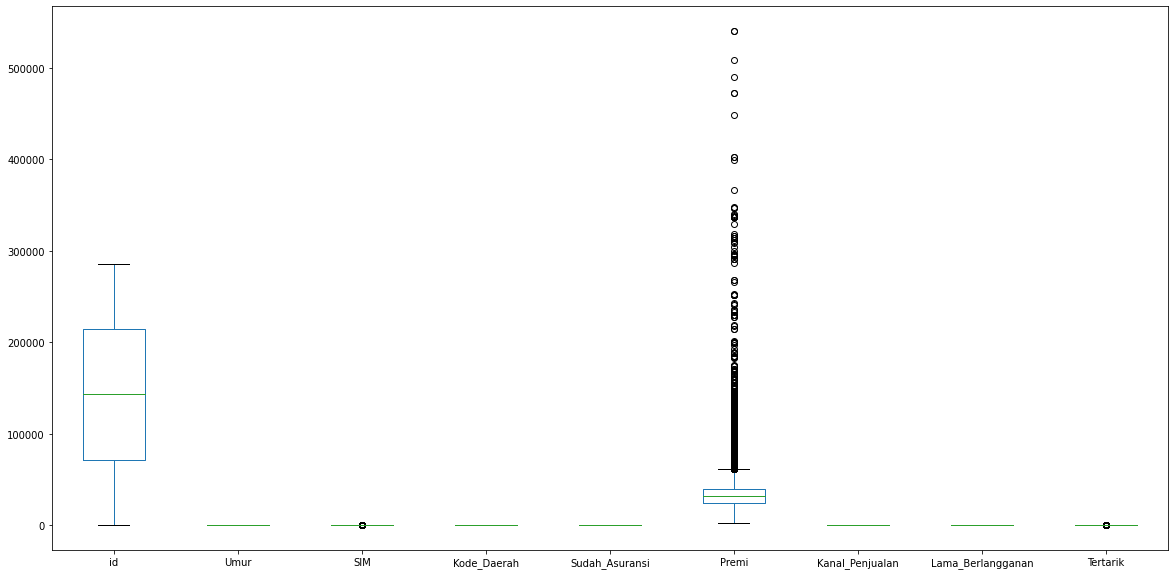

In [5]:
#melihat boxplot dari data train
df_train.plot(kind='box', figsize=(20, 10) )

In [6]:
#menghilangkan outlier pada data premi 
#tentukan outlier 
Q1 = df_train['Premi'].quantile(0.25)
Q3 = df_train['Premi'].quantile(0.75)
IQR = Q3 - Q1

Max = Q3 + (1.5 * IQR)
Min = Q1 - (1.5 * IQR)

more_than = df_train['Premi'] > Max
lower_than = df_train['Premi'] < Min

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


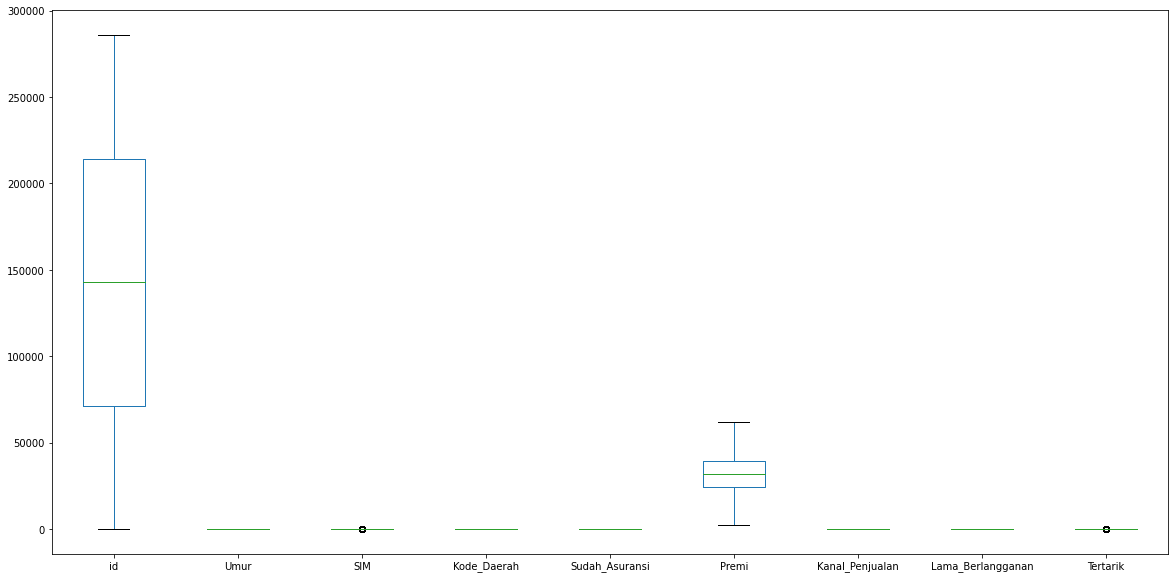

In [7]:
#hilangkan outlier
df_train['Premi'] = df_train['Premi'].mask(more_than, Max)
df_train['Premi'] = df_train['Premi'].mask(lower_than, Min)
df_train.plot(kind='box', figsize=(20, 10) )

In [8]:
#replace Umur_Kendaraan, Jenis_Kelamin, dan Kendaraan_Rusak to integer

df_train.replace(['< 1 Tahun', '1-2 Tahun', '> 2 Tahun'], [0,1,2], inplace=True)

df_train.replace(['Wanita', 'Pria'], [0,1], inplace= True)
df_train.replace(['Tidak', 'Pernah'], [0,1], inplace=True)

df_train.head(10)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.000,152.0,97.0,0
1,2,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.000,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,0.0,0.0,32733.000,160.0,119.0,0
3,4,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.000,124.0,63.0,0
4,5,1.0,50.0,1.0,35.0,0.0,2.0,NaN,34857.000,88.0,194.0,0
5,6,1.0,21.0,1.0,35.0,1.0,0.0,0.0,22735.000,152.0,171.0,0
6,7,0.0,33.0,1.0,8.0,0.0,NaN,1.0,32435.000,124.0,215.0,1
7,8,1.0,23.0,NaN,28.0,1.0,0.0,0.0,26869.000,152.0,222.0,0
8,9,0.0,20.0,1.0,8.0,1.0,0.0,0.0,30786.000,160.0,31.0,0
9,10,NaN,54.0,1.0,29.0,0.0,2.0,1.0,61847.375,124.0,28.0,1


In [9]:
#cek missing value 
print(df_train.isnull().sum())

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64


In [10]:
#drop missing value pada datatrain
X_train = df_train.dropna()

In [11]:
print(X_train.isna().sum())

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64


In [12]:
#drop kolom ID
X_train.drop(['id', 'Tertarik'], inplace=True, axis= 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
X_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0
1,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0
3,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0
5,1.0,21.0,1.0,35.0,1.0,0.0,0.0,22735.0,152.0,171.0
8,0.0,20.0,1.0,8.0,1.0,0.0,0.0,30786.0,160.0,31.0
...,...,...,...,...,...,...,...,...,...,...
285826,0.0,23.0,1.0,4.0,1.0,0.0,0.0,25988.0,152.0,217.0
285827,0.0,21.0,1.0,46.0,1.0,0.0,0.0,44686.0,152.0,50.0
285828,0.0,23.0,1.0,50.0,1.0,0.0,0.0,49751.0,152.0,226.0
285829,1.0,68.0,1.0,7.0,1.0,1.0,0.0,30503.0,124.0,270.0


In [19]:
from google.colab import  files
df_train.to_csv('kendaraan_preprocessed.csv', index=False)
files.download('kendaraan_preprocessed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Scalling dengan Standart Scaller

In [20]:
df = pd.DataFrame(StandardScaler().fit_transform(X_train))
df

,0,1,2,3,4,5,6,7,8,9
0,-1.084918,-0.567753,0.045537,0.496795,1.083923,-1.071127,-1.008925,-0.134222,0.734473,-0.682703
1,0.921729,0.591171,0.045537,0.949204,-0.922575,2.452328,0.991154,-0.278315,-1.538819,0.044680
2,-1.084918,1.235018,0.045537,1.627818,-0.922575,0.690601,-1.008925,-1.776129,0.216975,-1.088129
3,0.921729,-1.147215,0.045537,0.647598,1.083923,-1.071127,-1.008925,-0.476450,0.734473,0.199696
4,-1.084918,-1.211599,0.045537,-1.388242,1.083923,-1.071127,-1.008925,0.044003,0.882329,-1.469707
...,...,...,...,...,...,...,...,...,...,...
171063,-1.084918,-1.018445,0.045537,-1.689848,1.083923,-1.071127,-1.008925,-0.266162,0.734473,0.748214
171064,-1.084918,-1.147215,0.045537,1.477015,1.083923,-1.071127,-1.008925,0.942562,0.734473,-1.243145
171065,-1.084918,-1.018445,0.045537,1.778621,1.083923,-1.071127,-1.008925,1.269986,0.734473,0.855532
171066,0.921729,1.878864,0.045537,-1.463643,1.083923,0.690601,-1.008925,0.025708,0.216975,1.380202


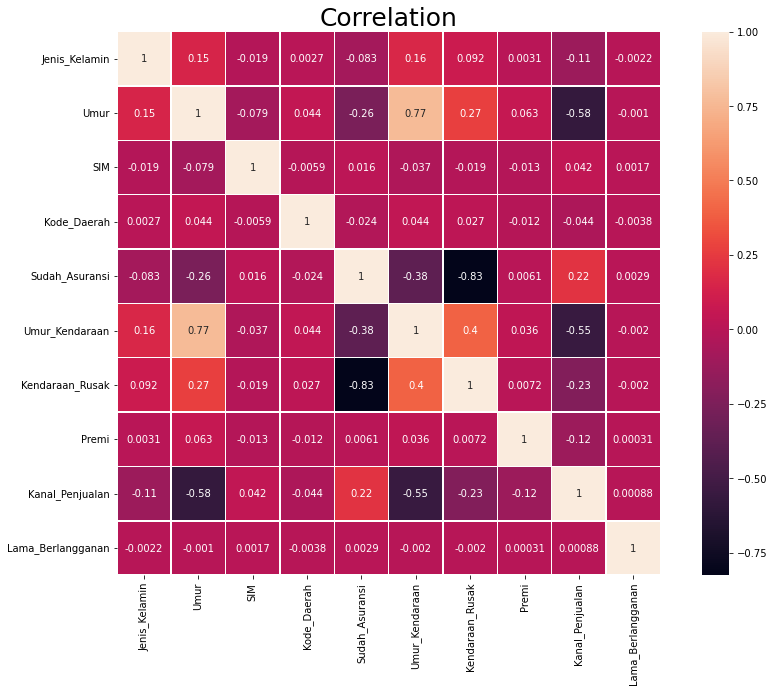

In [21]:
#lihat korelasi antar data

correlation_X = X_train.corr()

plt.figure(figsize=(15,10))

plt.title('Correlation', y=1, size=25)
#mask = np.triu(np.ones_like(correlation_X, dtype=bool))

sns.heatmap(correlation_X, annot= True, linewidths= .5, square=True)

plt.show()

## Feature Selection Dengan PCA 

In [22]:
pca_train = PCA(n_components=2)
principalComponents_train = pca_train.fit_transform(df)

In [23]:
data = pd.DataFrame(data = principalComponents_train
             , columns = ['principal component 1', 'principal component 2'])

In [24]:
data.head()

,principal component 1,principal component 2
0,-2.103030,0.328918
1,3.075764,0.300825
2,0.615086,0.099066
3,-2.096901,0.257983
4,-2.534807,0.014708


In [25]:
# Mengecek Total Data Pada Dataframe
print("Total Data :", len(data))

Total Data : 171068


Text(0, 0.5, 'principal component 2')

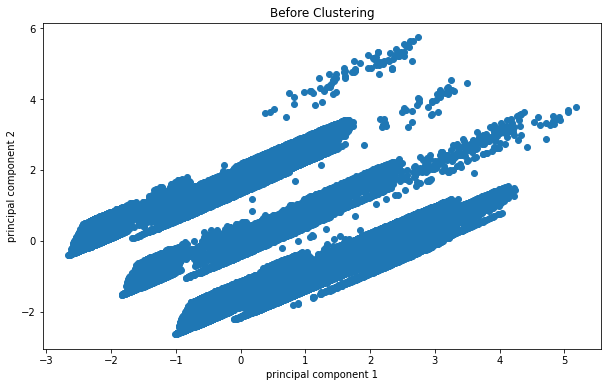

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(
    data.iloc[:, 0],
    data.iloc[:, 1],
)
plt.title('Before Clustering')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])

##K-Means

In [32]:
#fungsi menghitung jarak data ke centroid menggunakan eucledian distance 
def euclidianDistance(instance1,instance2):
  distance = 0
  x=0
  for x in range(len(instance2)):
    distance += pow((instance1[x]-instance2[x]), 2 )
  return math.sqrt(distance)

In [33]:
# fungsi untuk menghitung apakan centroid sudah tetap atau belum 
def convergent(temp_centroids, centroids):
  if( np.array(centroids).all != np.array(temp_centroids).all):
    return False

  return True

In [34]:
def kMeans(K , max_iterasi,data):
  sum_square_error = 0

  # inisialisasi centroid 
  centroids = {i: data[random.randint(0, len(data))] for i in range(K)}
  # copy centroid sekarang untuk dibandingkan dengan centroid setelahnya
  temp_centroids = centroids.copy()

  for _ in range(max_iterasi):
    #mendefinisikan cluster 
    cluster = {i : [] for i in range(K)}
    sse = []

    #mencari nilai terdekat data dengan euclidiant distance dan masukan ke cluster 
    for x in data:
      jarak = [euclidianDistance(x, centroids[c]) for c in centroids]
      sse.append(np.min(jarak))

      cluster[jarak.index(min(jarak))].append(x)
    #merecompute centroid ulang dari setiap cluster dengan mean nya
    for i in cluster:
      centroids[i] = np.mean(cluster[i], axis= 0)
    #mengecek apakah centroid suda h stabil atau belum 
    if convergent(temp_centroids, centroids) : break
    #copy centroid sekarang untuk dibandingkan dengan centroid berikutnya 
    temp_centroids = centroids.copy()
  
  return centroids, cluster, sum(sse)

In [42]:
def clustering(cluster):
  data = []
  #memasukan data yang sudah dimodelkan ke dataframe 
  for key in cluster[1].keys():
    for i in cluster[1].get(key):
      data.append((i[0], i[1], key))

  
  data = pd.DataFrame(data)
  data.columns = ['principal component 1', 'principal component 2', 'Cluster']

  return data

#Main Function 

In [37]:
sse_ = []
_cluster_ = []

data_train = np.array(data)
max_iterasi= 100
K = 3
for i in range(2,6):
  centroid, cluster, sse = kMeans(i,max_iterasi, data_train)
  print('jumlah cluster', i , centroid)

  sse_.append(sse)
  _cluster_.append([i,cluster, centroid])

jumlah cluster 2 {0: array([ 1.20399988, -0.62981834]), 1: array([-1.35029852,  0.70634789])}
jumlah cluster 3 {0: array([0.38945483, 1.77505425]), 1: array([-1.99871592,  0.20993268]), 2: array([ 1.18565547, -0.7466975 ])}
jumlah cluster 4 {0: array([-2.02448746,  0.24450674]), 1: array([0.33598201, 1.70489957]), 2: array([ 1.97717363, -0.19587871]), 3: array([-0.06411671, -1.58756563])}
jumlah cluster 5 {0: array([ 1.09899816, -0.83162072]), 1: array([2.35011721, 0.18510421]), 2: array([-0.655481  , -1.66925831]), 3: array([0.26930477, 1.77895773]), 4: array([-2.08315782,  0.33531222])}


##Elbow Method

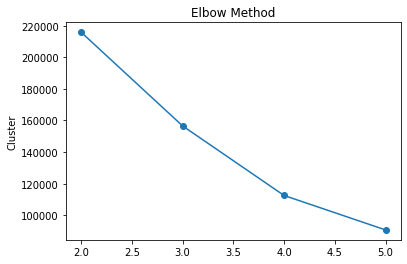

In [38]:
K = range(2,6)
plt.plot(K, sse_, marker = 'o')
plt.ylabel('sum_square_error')
plt.ylabel('Cluster')
plt.title('Elbow Method')

plt.show()

In [44]:
def visualisasi_cluster(clusters):
    klasterisasi = []

    fig, axis = plt.subplots(2, 2, figsize=(15, 15))
    row = 0
    col = 0
   
    for cluster in clusters: 
        data = clustering(cluster)
        klasterisasi.append(data)

        #Set Warna
        colors = ['hotpink', '#88c999', 'magenta', 'cyan', 'green', 'pink']

        axis[col, row].set_title(f'{cluster[0]} Cluster', fontsize=14)

        
        for i in range(cluster[0]):
            axis[col][row].scatter(
                data['principal component 1'][data['Cluster'] == i],
                data['principal component 2'][data['Cluster'] == i],
                color=colors[i],
                label=f'Cluster {i}'
            )

            axis[col][row].scatter(cluster[2][i][0], cluster[2][i][1], color='k', marker='P')

        axis[col][row].scatter(cluster[2][0][0], cluster[2][0][1], color='k', label="Centroids", marker='P')
                            
        axis[col][row].legend(loc='best', bbox_to_anchor=(1, 0.5))

        row += 1
        if row == 2: row = 0
        if row == 0 and col == 0: 
            row = 0
            col = 1 

    for ax in axis.flat:
        ax.set(xlabel='principal component 1', ylabel='principal component 1')
        ax.label_outer()

    plt.subplots_adjust(wspace=0.3, hspace=0.1)
    plt.show()

    return klasterisasi

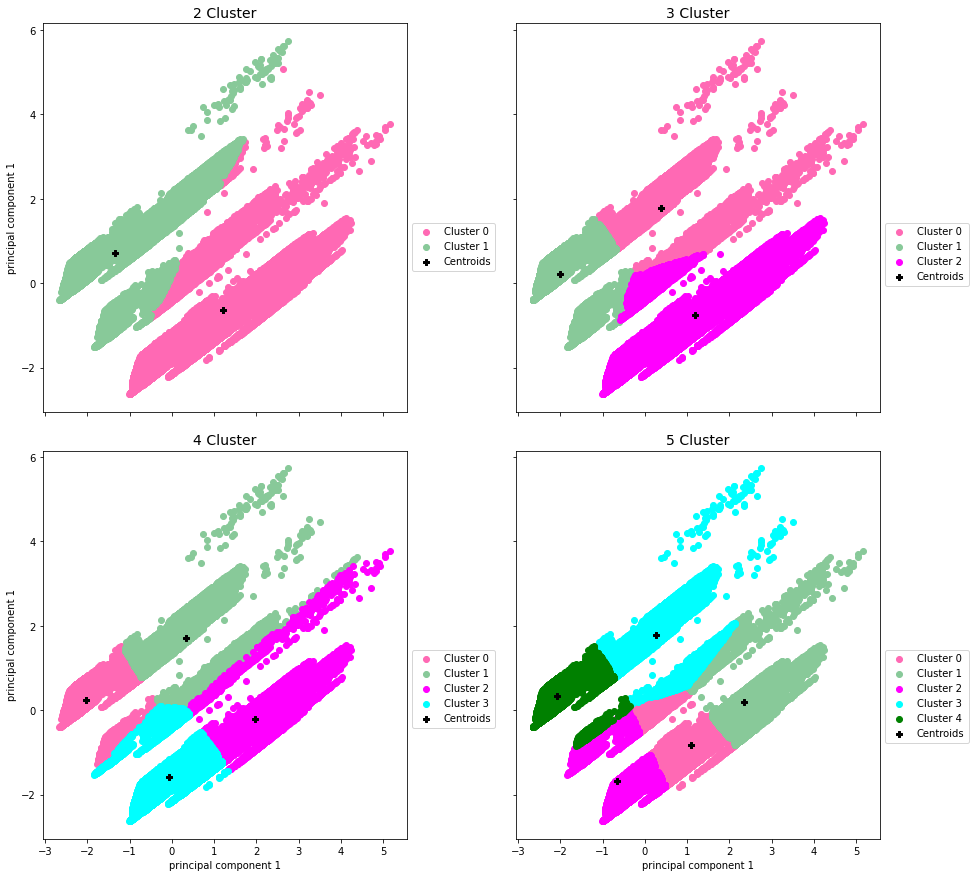

In [45]:
clusterize = visualisasi_cluster(_cluster_)

##Pengecekan Menggunakan Silhouette Score

In [47]:
from sklearn.metrics import silhouette_score 

for i, cluster in enumerate(clusterize):
    score = silhouette_score(cluster[['principal component 1', 'principal component 2']], cluster['Cluster'])
    print(f'Cluster-{i+3}, Silhouette Score = {score}')

Cluster-3, Silhouette Score = 0.4974716718441717
Cluster-4, Silhouette Score = 0.5283522703475174
Cluster-5, Silhouette Score = 0.5838863930308109
Cluster-6, Silhouette Score = 0.5813013052811093
